# Основы навигационных систем - Лекция 3-4
# Тема: Виды сигналов и их обработка

## Сигналы

*Сигналом* называется физический процесс, параметры которого изменяются в соответствии с передаваемым сообщением. Cигнал является материальным носителем информации. По способу представления сигналы разделяются на две группы – *случайные* и *детерминированные*. Их описывают математической моделью или функцией, характеризующей изменение параметров сигнала.  

*Случайным* сигналом называют функцию времени, значения которой заранее неизвестны и могут быть предсказаны лишь с некоторой *вероятностью*. К основным характеристикам случайных сигналов относятся:

* закон распределения (относительное время пребывания значения сигнала в определенном интервале),
* спектральное распределение мощности.

*Детерминированные* сигналы описываются аналитической функцией (задаются аналитически), и их поведение полностью известно в любой момент времени. Детерминированные сигналы в свою очередь бывают *периодическими* и *непериодическими*. Непериодические сигналы, как правило, ограничены во времени. 

*Периодический* сигнал - это сигнал, который повторяется во времени с определенным периодом, то есть для которого выполняется условие:

$$ s(t) = s(t+kT) \tag{1.1}$$

где *k* – любое целое число, *T* – период повторения.

Пример *периодического* сигнала – гармоническое колебание, описываемое следующим выражением:

$$ s(t) = A \cdot cos(\frac{2\pi\cdot t}{T} +\phi) \tag{1.2}$$

где *A* – амплитуда колебания, $ \phi $ – начальная фаза. 

Известно, что любой сложный периодический сигнал может быть представлен в виде суммы гармонических колебаний с частотами, кратными основной частоте $ \omega = 2\pi/T $. 

### Цифровые сигналы

Все сигналы можно разделить на четыре группы: 
* аналоговые, 
* дискретные, 
* квантованные,
* цифровые.

**Аналоговый** сигнал – описывается непрерывной функцией времени. Аналоговый сигнал обеспечивает передачу данных путем непрерывного изменения во времени амплитуды, частоты или фазы. Практически все физические процессы описываются непрерывными функциями времени, поэтому представляют собой аналоговые сигналы. Для аналогового сигнала область значений и определения описывается *непрерывным множеством*. 

Для **дискретного** сигнала свойственно прерывистое (дискретное) изменение сигнала во времени. То есть изменения в сигнале происходят скачкообразно через некоторые промежутки времени, называемые интервалом дискретизации – Δt или Td. Дискретизация *аналогового сигнала* состоит в том, что сигнал представляется в виде последовательности значений, взятых в дискретные моменты времени, которые называются *отсчётами* (сэмплами). 

Для правильного восстановления аналогового сигнала из цифрового без искажений и потерь используется теорема отсчетов, известная как **теорема Котельникова (Найквиста-Шеннона)**. 

> Любой непрерывный сигнал с ограниченным спектром может быть восстановлен однозначно и без потерь по своим дискретным отсчетам, взятым с частотой строго больше удвоенной верхней частоты спектра непрерывного сигнала.

Формула теоремы Котельникова:  

$$ F_s = \frac{1}{T_s} > 2F_a \tag{1.3}$$

где
* F<sub>s</sub> - частота дискретизации сигнала,
* F<sub>a</sub> - верхняя частота спектра аналогового сигнала.

Такое определение относится к функциям времени, которые состоят из частот от нуля до $F_a$.

В реальных задачах спектр сигнала может лежать в любом диапазоне частот и начинаться и заканчиваться на любой частоте, в связи с этим определение Теоремы Котельникова правильно рассматривать относительно ширины спектра такого сигнала:

> Любой непрерывный сигнал с ограниченным спектром может быть восстановлен однозначно и без потерь по своим дискретным отсчетам, взятым с частотой строго больше удвоенной ширины полосы частот, занимаемой спектром непрерывного сигнала. 

$$ F_s = \frac{1}{T_s} > 2\Delta f \tag{1.4}$$ 

где $\Delta f$ - ширина спектра непрерывного сигнала.

**Квантованные** сигналы принимают ряд конечных значений из диапазона непрерывных или дискретных величин. Как правило, сигналы квантуются по уровню, то есть по амплитуде.

**Цифровые** сигналы получаются из аналоговых с помощью операций **дискретизации** и **квантования** по уровню. Значениям цифрового сигнала присваивается кодовое слово или набор символов (зачастую двоичных). 

Устройства, осуществляющие дискретизацию по времени и квантование по уровню, называются **аналого-цифровыми преобразователями (АЦП)**.
Устройства, переводящие цифровой сигнал в аналоговый называются **цифро-аналоговыми преобразователями (ЦАП)**. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

%matplotlib inline

Функция `%matplotlib inline` позволяет отображать графики без вызова метода `plt.show()`

На приведенном ниже примере представлены сигналы в аналоговой, дискретной и квантованной форме.

**Шаг 1**: создать ряд временных значений:
Функция `np.linspace(start, stop, num)` задает вектор в диапазоне [start, stop], а *num* - количество точек в диапазоне.

**Шаг 2**: создать сигнал произвольной формы:
С помощью функции `np.sin()` задаём сигнал из набора гармонических воздействий. Для простоты амплитуды всех компонент равны 1, а смещение по фазе нулевое.

**Шаг 3** Отрисовка графиков.
Методы matplotlib задают различный стиль отображения:
* `plot()` - стандартный график, выводит сигнал в аналоговой форме,
* `stem()` - график в виде отсчетов, выводит сигнал в дискретной форме,
* `step()` - график в виде уровней, выводит сигнал в квантованной форме.

Для уменьшения количества кода создана вспомогательная функция `plt_sel(s, *args, **kwargs)`, которая выбирает стиль отображения графика. Аргументы `*args` передают значения по осям ординат и абсцисс, `**kwargs` используется для передачи параметров в метод `stem()`.

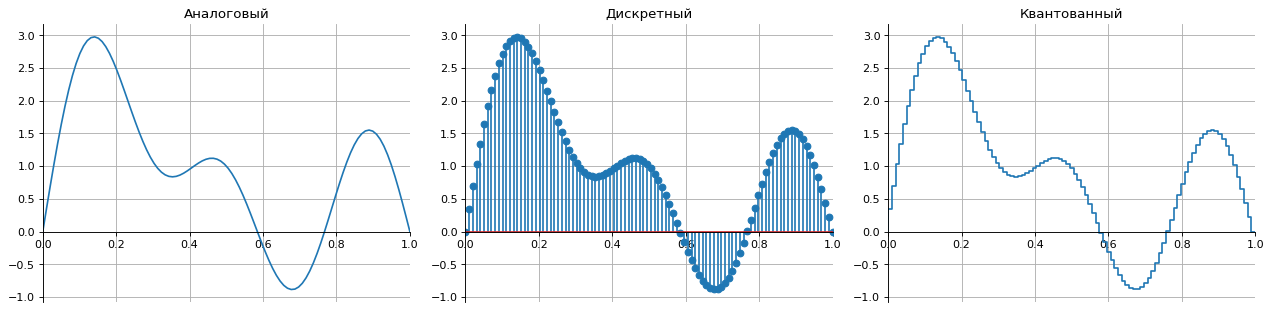

In [2]:
n = 100
# time vector
t = np.linspace(0, 1, n, endpoint=True)
# sine wave
x = np.sin(np.pi*t) + np.sin(2*np.pi*t) + np.sin(3*np.pi*t) + np.sin(5*np.pi*t)

# Select: plot, stem, bar
def plt_sel(s, *args, **kwargs):
    if s == 0:
        return plt.plot(*args)
    if s == 1:
        return plt.stem(*args, **kwargs)
    if s == 2:
        return plt.step(*args)

# Subplot titles
t_titles = ['Аналоговый', 'Дискретный', 'Квантованный']

# Plot figures
fig = plt.figure(figsize=(16, 4), dpi=80)
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(t_titles[i]) 
    plt_sel(i, t, x)
    plt.xlim([0, 1])
    plt.yticks(np.linspace(np.floor(np.min(x)), np.ceil(np.max(x)), 9))
    plt.grid(True)
    
    # change plot view
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
plt.tight_layout()

Если шаг квантования и дискретизации выбраны неправильно, преобразование сигнала из аналоговой формы в дискретную будет происходить с искажениями. Покажем на примере неграмотный выбор шага дискретизации и шага квантования.

Зададим график синуса. Длина сигнала `n = 64` отсчетов, на которых укладывается один период гармонического сигнала. Установим шаг квантования таким образом, чтобы иметь выборку из `d = 3, 5, 8 и 32` отсчетов.

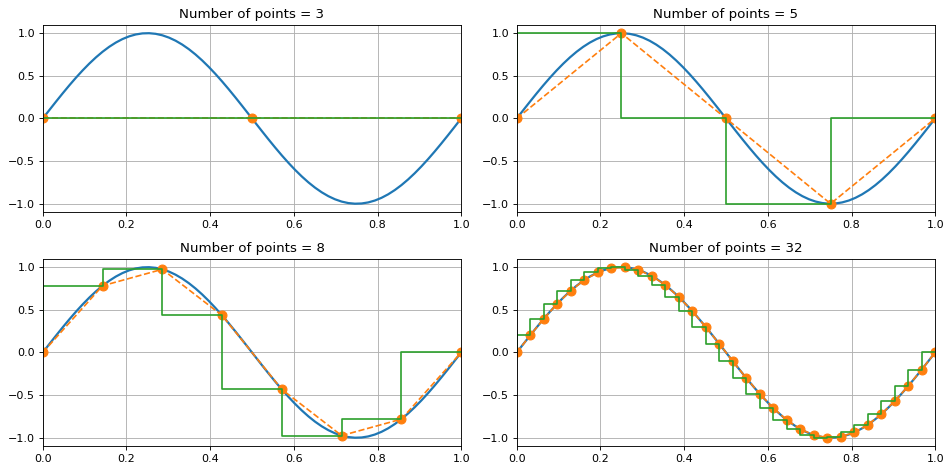

In [3]:
n = 64
# time vector
t = np.linspace(0, 1, n, endpoint=True)
# sine wave
ds = np.sin(2*np.pi*t)

# discrete step
step_lst = np.array([3, 5, 8, 32])

#plot figure
fig = plt.figure(figsize=(12, 6), dpi=80)
for i in range(4):
    tt = np.linspace(0, 1, step_lst[i], endpoint=True)
    
    plt.subplot(2, 2, i+1)
    plt.title('Number of points = {}'.format(step_lst[i]))
    plt.plot(t, ds, '-', linewidth=2.0)
    plt.plot(tt, np.sin(2*np.pi*tt), '--o', linewidth=1.5, markersize=8)
    plt.step(tt, np.sin(2*np.pi*tt), linewidth=1.5)
    plt.grid()
    plt.xlim([0, 1])
plt.tight_layout()

Как видно, наихудшая форма сигнала получилась при большом значении шага дискретизации, то есть большом расстоянии между соседними отсчетами цифрового сигнала. 
Чем меньше расстояние между соседними отсчетами (меньше шаг дискретизации и больше число точек последовательности), тем лучше дискретный сигнал повторяет форму аналогового сигнала.
____

## Спектр сигнала

Сигналы могут быть представлены во временной и в частотной областях.

**Временная область** — это представление сигнала в зависимости от времени. Сигналы в этой области обычно изображаются как функции времени, где по горизонтальной оси откладывается время, а по вертикальной — амплитуда сигнала. Это привычный вид представления сигналов, например, для аудиосигналов или электрических сигналов. Основная задача работы с временной областью — анализ изменения сигнала во времени.

**Частотная область**, напротив, представляет сигнал через его составляющие частоты. Вместо анализа изменения сигнала с течением времени, частотная область показывает, какие частоты содержатся в сигнале и какова их амплитуда. Частотная область полезна для понимания, какие частотные компоненты доминируют в сигнале, что важно, например, при обработке различных сигналов.

Преобразование между этими двумя областями позволяет увидеть скрытую структуру сигнала и эффективно решать задачи фильтрации, компрессии и восстановления сигналов.

### Прямое преобразование Фурье

Чтобы преобразовать сигнал из временной области в частотную и обратно необходимо выполнить операцию под названием дискретное **преобразование Фурье**.

Запишем формулу прямого преобразования Фурье для дискретной последовательности x(nT). Прямым дискретным преобразованием Фурье (ДПФ) называется преобразование последовательности  `x(n), n = 0, ... , N–1` в последовательность `X(k), k = 0, ..., N–1` по следующей формуле:

$$ X(k) = \sum_{n=0}^{N-1}x(nT)\cdot e^{(-2\pi j\cdot nk/N)} = \sum_{n=0}^{N-1}x(nT)\cdot W^{-nk} \tag{1.5}$$  

где $k = 0, ..., N-1$.

- $N$ – количество компонент разложения, число измеренных за период значений сигнала;
- $n$ – номер отсчета дискретизированного сигнала, n = 0,1, ... , N–1;	
- $k$ – номер гармоники компонента преобразования, а T — период времени, в течение которого брались входные данные; 
- $W = e^{-2\pi j / N}$ – поворотный множитель.

В этой формуле $X(kT) = X(e^{j\omega T})$ является спектральной плотностью (спектром) дискретной последовательности. Выражение для спектра дискретной последовательности можно найти, заменив в её Z-форме переменную $z = e^{j\omega T}$  

Для аналоговых сигналов выражение суммы превращается в интеграл.

Используя **формулу Эйлера**

$$ e^{j\omega T} = cos(\omega T) + j\cdot sin(\omega T) \tag{1.6}$$

можно определить *вещественную* и *мнимую* составляющие, а также **модуль** и **аргумент** спектральной плотности, которые связаны с вещественной и мнимой частями спектра через формулы теории функции комплексного переменного. 

Модуль:  

$$ |X(kT)| = \sqrt{Re(X)^2 + Im(X)^2} \tag{1.7}$$ 

Фаза (аргумент):  

$$ arg(X(kT)) = \arctan{\frac{Im(X)}{Re(X)}} \tag{1.8}$$ 

Таким образом, ДПФ для $N$ входных отсчетов сигнала ставит в соответствие N спектральных отсчётов. Из формулы ДПФ для вычисления одного спектрального отсчета требуется N операций комплексного умножения и сложения. Поскольку таких операций $N$, то общая вычислительная сложность ДПФ равна $N^2$

### Обратное преобразование Фурье

**Обратное дискретное преобразование Фурье** (ОДПФ) есть перевод последовательности `X(k), k = 0, ..., N–1` в последовательность `x(n), n = 0, ... , N–1` по формуле:

$$ x(nT) = \frac{1}{N}\sum_{n=0}^{N-1}X(k)\cdot e^{(2\pi j\cdot nk/N)} = \frac{1}{N}\sum_{n=0}^{N-1}X(k)\cdot W^{nk} \tag{1.9}$$  

где `x(n)` –  измеренная последовательность в дискретных временных точках, значения которой являются исходными данными для прямого преобразования и выходными для обратного
`X(k)` – N–последовательность комплексных амплитуд синусоидальных сигналов, образующих исходный сигнал `x(n)`; значения последовательности являются выходными данными для *прямого* преобразования и входными для *обратного*

Поскольку амплитуды спектральных отсчетов - комплексные величины, то по ним можно вычислить одновременно и амплитуду, и фазу сигнала.

____

Как следует из теоремы **Найквиста-Котельникова**, ДПФ точно соответствует непрерывному преобразованию Фурье, если преобразуемая функция есть функция с ограниченным спектром, при этом частота дискретизации **Fд** должна быть не меньше удвоенной максимальной частоты спектра **Fв**. Следует отметить, что для ДПФ справедливы правила и свойства. 

### Спектр гармонического сигнала

Покажем, как выглядит спектр гармонического сигнала. Для этого зададимся длиной БПФ `N = 32` отсчёта. Посмотрим, что происходит при вычислении ОБПФ для сигнала, который задан в частотной области в виде единичного отсчета на определенной позиции.

Обратите внимание, что вычисляется прямое БПФ, поскольку операции БПФ и ОБПФ равнозначны и отличаются на константу и знак в поворачивающих множителях.

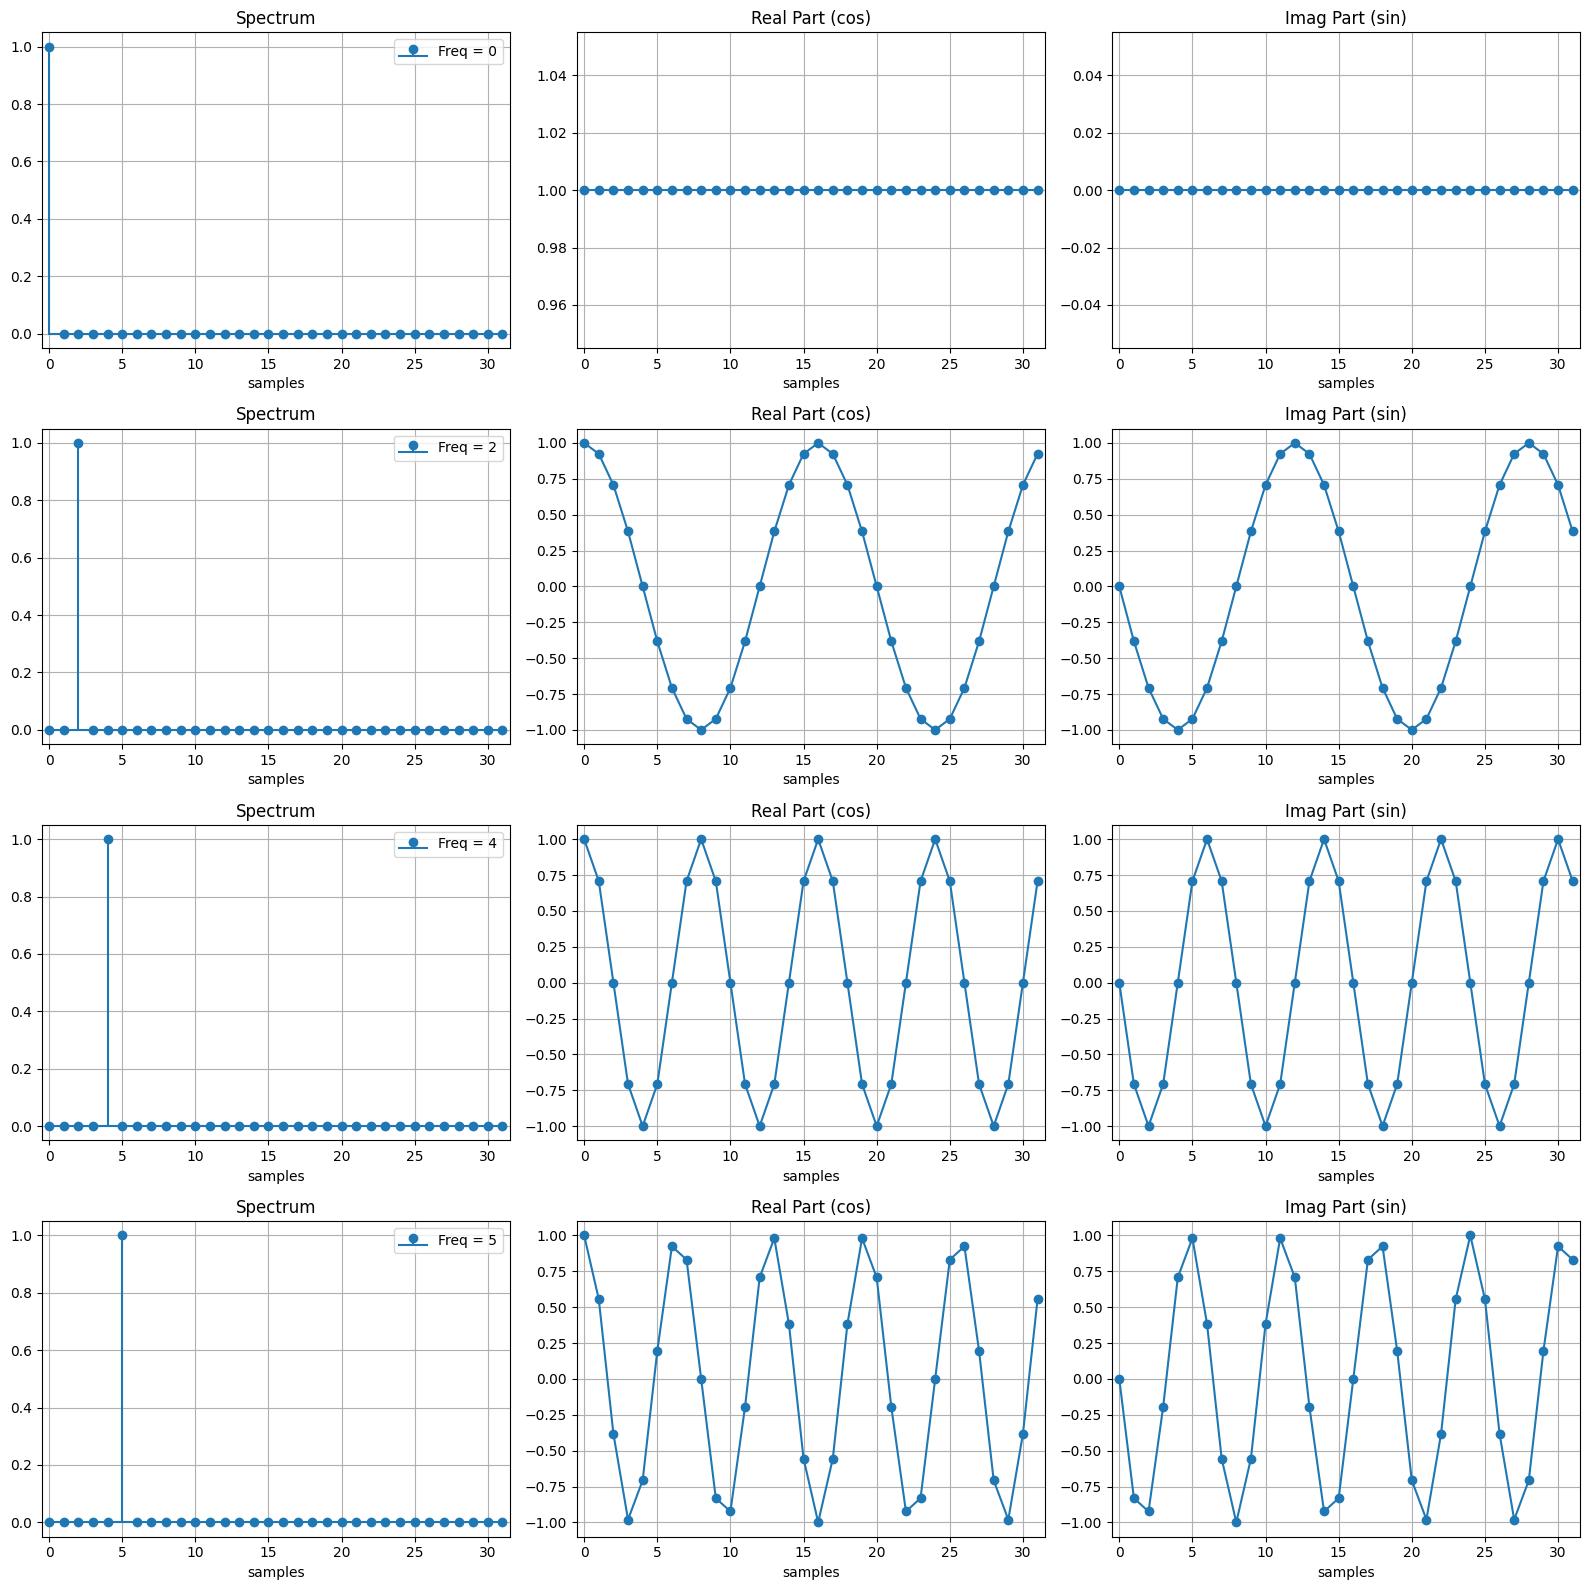

In [4]:
N, M = 32, 4

# Create freq signal
x = np.zeros((N,M))

# Fill freqs of signal
freqs = 0, 2, 4, 5
for idx, i in enumerate(freqs):
    x[i][idx] = 1


# Calculate FFT
X = fft(x, axis=0)

# Plot results
fig = plt.figure(figsize=(16, 16), dpi=100)
for i in range(M*3):
    plt.subplot(4, 3, i+1)
    if i % 3 == 0:
        plt.title('Spectrum')
        plt.stem(x[:,i//3], basefmt='C0', label=f"Freq = {freqs[i//3]}")
        plt.legend(loc="upper right")
    if (i-1) % 3 == 0:
        plt.title('Real Part (cos)')
        plt.plot(np.real(X[:,i//3]), '-o')
    if (i-2) % 3 == 0:
        plt.title('Imag Part (sin)')
        plt.plot(np.imag(X[:,i//3]), '-o')      
    plt.xlim([-0.5, N-0.5])
    plt.xlabel('samples')
    plt.grid()
plt.tight_layout()

### Спектр суммы гармонических сигналов

Покажем, как выглядит спектр суммы гармонических сигналов (работает **аддитивный закон**: спектр суммы сигналов равен сумме спектров сигналов).

Сигнал состоит из трех гармонических компонент.  
Амплитуды гармоник: `A1, A2, A3 = 5, 1, 3`  

Частоты гармоник: `f1, f2, f3 = 2, 7, 12`  

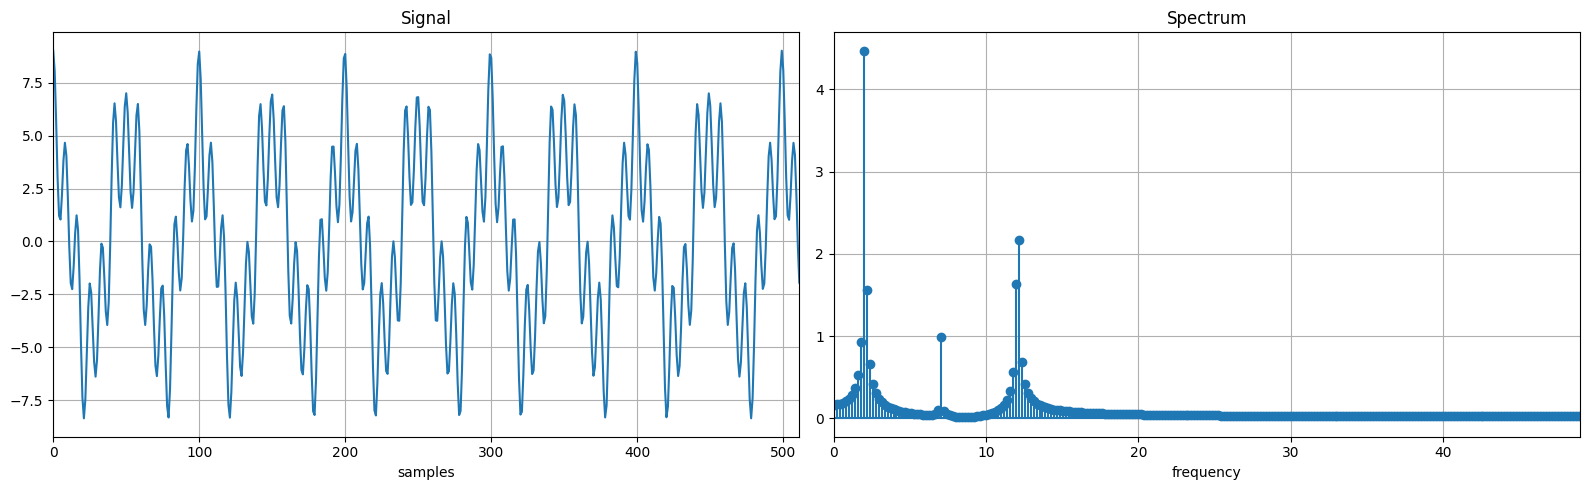

In [6]:
N = 512
# Time vector
t = np.linspace(0, 1, N)
fd = 100
f = np.linspace(0, fd, N)

# Amplitudes and freqs
f1, f2, f3 = 2, 7, 12
A1, A2, A3 = 5, 1, 3

# Signal
x = A1 * np.cos(2*np.pi*f1*(N/fd)*t) + A2 * np.cos(2*np.pi*f2*(N/fd)*t) + A3 * np.cos(2*np.pi*f3*(N/fd)*t)

# Calculate FFT
X = fft(x)
X = 2*np.abs(X) / N

# Plot results
fig = plt.figure(figsize=(16, 5), dpi=100)
# Time: signal
plt.subplot(1, 2, 1)
plt.title('Signal')
plt.plot(x)
plt.xlim([0, N-1])
plt.xlabel('samples')
plt.grid()

# Freq: Spectrum
plt.subplot(1, 2, 2)
plt.title('Spectrum')
plt.stem(f, X, basefmt='C0')
plt.xlim([0, fd//2-1])
plt.xlabel('frequency')
plt.grid()
plt.tight_layout()

## Фильтрация сигнала.

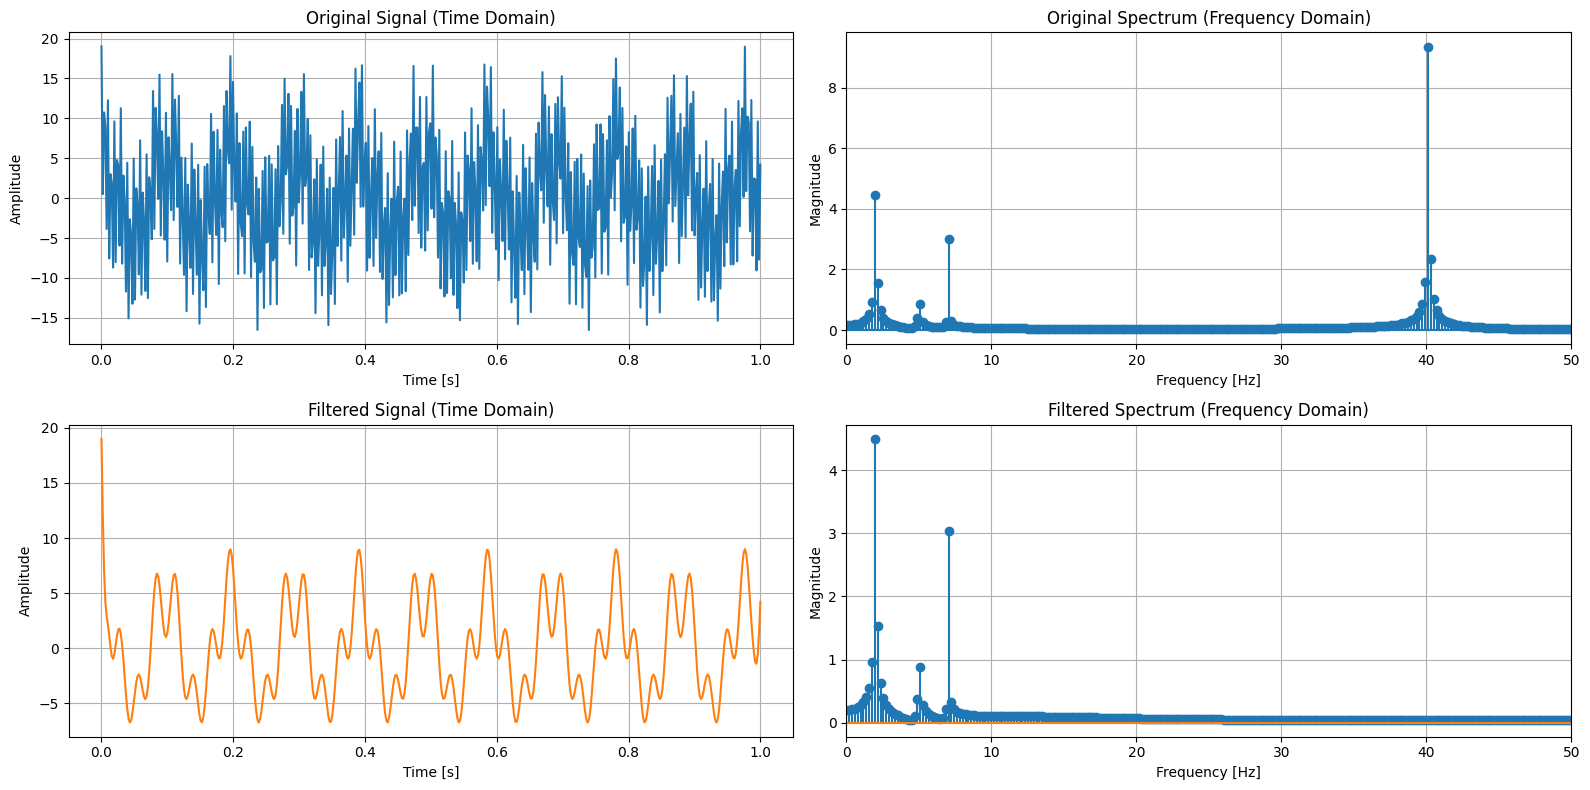

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import butter, filtfilt

# Parameters
N = 512  # Number of samples
fd = 100  # Sampling frequency
t = np.linspace(0, 1, N)  # Time vector
f = np.linspace(0, fd, N)  # Frequency vector

# Amplitudes and frequencies of the signal
f1, f2, f3, f_high = 2, 5, 7, 40  # Frequencies
A1, A2, A3, A_high = 5, 1, 3, 10  # Amplitudes

# Create a signal with a high-frequency component
x = A1 * np.cos(2 * np.pi * f1 * (N/fd) * t) + A2 * np.cos(2 * np.pi * f2 * (N/fd) * t) + A3 * np.cos(2 * np.pi * f3 * (N/fd) * t) + A_high * np.cos(2 * np.pi * f_high * (N/fd) * t)

# Calculate the FFT of the original signal
X = fft(x)
X = 2 * np.abs(X) / N  # Normalized FFT

# Design a low-pass filter (Butterworth)
cutoff = 15  # Cutoff frequency in Hz
b, a = butter(4, cutoff / (fd / 2), btype='low')  # 4th order Butterworth filter
x_filtered = filtfilt(b, a, x)  # Apply the filter to the signal

# FFT of the filtered signal
X_filtered = fft(x_filtered)
X_filtered = 2 * np.abs(X_filtered) / N

# Plot results
fig, axs = plt.subplots(2, 2, figsize=(16, 8), dpi=100)

# Time-domain signal (original)
axs[0, 0].set_title('Original Signal (Time Domain)')
axs[0, 0].plot(t, x, 'C0')
axs[0, 0].set_xlabel('Time [s]')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].grid()

# Time-domain signal (filtered)
axs[1, 0].set_title('Filtered Signal (Time Domain)')
axs[1, 0].plot(t, x_filtered, 'C1')
axs[1, 0].set_xlabel('Time [s]')
axs[1, 0].set_ylabel('Amplitude')
axs[1, 0].grid()

# Frequency-domain (original)
axs[0, 1].set_title('Original Spectrum (Frequency Domain)')
axs[0, 1].stem(f, X, basefmt='C0')
axs[0, 1].set_xlim([0, fd // 2])
axs[0, 1].set_xlabel('Frequency [Hz]')
axs[0, 1].set_ylabel('Magnitude')
axs[0, 1].grid()

# Frequency-domain (filtered)
axs[1, 1].set_title('Filtered Spectrum (Frequency Domain)')
axs[1, 1].stem(f, X_filtered, basefmt='C1')
axs[1, 1].set_xlim([0, fd // 2])
axs[1, 1].set_xlabel('Frequency [Hz]')
axs[1, 1].set_ylabel('Magnitude')
axs[1, 1].grid()

plt.tight_layout()
plt.show()
